## Problem Statement

Dream Housing Finance Inc. specializes in home loans across different market segments - rural, urban and semi-urban.  Thier loan eligibility process is based on customer details provided while filling an online application form. To create a targeted marketing campaign for different segments, they have asked for a comprehensive analysis of the data collected so far.

## About the Dataset
The dataset has details of 614 customers with the following 13 features

|Feature|Description|
|-----|-----|
|Loan_ID|Unique Loan ID|
|Gender|Male/Female|
|Married|Applicant Married (Y/N)|
|Dependents|Number of dependents|
|Education|Graduate/Under Graduate|
|Self_Employed|Self employed (Y/N)|
|ApplicantIncome|Income of the applicant|
|CoapplicantIncome|Income of the co-applicant|
|LoanAmount|Loan amount in thousands|
|Loan_Amount_Term|Term of loan in months|
|Credit_History|credit history meets guidelines}|
|Property_Area| Urban/Semi-Urban/Rural|
|Loan_Status|Loan approved (Y/N)|



Our major work for this project involves data analysis using Pandas. 

## Why solve this project ?

After completing this project, you will have better grip on working with pandas. In this project you will apply following concepts.

 
- Dataframe slicing 
- Dataframe aggregation 
- Pivot table operations

In [1]:
# Import packages
import numpy as np
import pandas as pd
from scipy.stats import mode 


## Task 1
**Let's check which variable is categorical and which one is numerical so that you will get a basic idea about the features of the bank dataset.**

#### Instructions :

- Create dataframe `bank` by passing the `path` of the file


- Create the variable `'categorical_var'` and using `'df.select_dtypes(include = 'object')'` check all categorical values.  


- print `'categorical_var'`


- Create the variable `'numerical_var'` and using `'df.select_dtypes(include = 'number')'` check all categorical values.


- print `'numerical_var'`

In [3]:
bank=pd.read_csv(r"C:\Users\dell\Desktop\rupesh\Data Science Courses\GreyAtom_FDP\complete class\Day_4_loan_approval_analysis\data\data.csv")

In [4]:
bank.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
bank.shape

(614, 13)

In [9]:
bank.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
bank.describe(exclude='number')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001819,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
bank.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
bank.isnull().sum()/len(bank)*100


Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [14]:
pd.DataFrame(bank.isnull().sum()/len(bank)*100)

,0
Loan_ID,0.000000
Gender,2.117264
Married,0.488599
Dependents,2.442997
Education,0.000000
Self_Employed,5.211726
ApplicantIncome,0.000000
CoapplicantIncome,0.000000
LoanAmount,3.583062
Loan_Amount_Term,2.280130


In [15]:
nulls = pd.DataFrame(bank.isnull().sum()).merge(pd.DataFrame(bank.isnull().sum()/len(bank)*100), left_index=True, right_index=True)
nulls.columns = ['count', 'ratio']
nulls.round(2)


,count,ratio
Loan_ID,0,0.00
Gender,13,2.12
Married,3,0.49
Dependents,15,2.44
Education,0,0.00
Self_Employed,32,5.21
ApplicantIncome,0,0.00
CoapplicantIncome,0,0.00
LoanAmount,22,3.58
Loan_Amount_Term,14,2.28


In [16]:
bank.select_dtypes(include='number')

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [17]:
bank.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [18]:
bank.select_dtypes(exclude='number')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [20]:
numeric_var=bank.select_dtypes(include='number')
numeric_var

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


In [21]:
categorical_var=bank.select_dtypes(exclude='number')
categorical_var

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


In [22]:
# 1. (use OS library) Create a function to list all the files and folders within a directory, provide what are the unique file types in the directory and what is the total of all file sizes
# 2. Convert basic data check into a function


In [29]:
bank[bank['Married'].isnull()]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [30]:
bank['Married'].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [31]:
bank['Married'].value_counts(normalize=True)*100

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

## Task 2

**Sometimes customers forget to fill in all the details or they don't want to share other details. Because of that, some of the fields in the dataset will have missing values. Now you have to check which columns have missing values and also check the count of missing values each column has. If you get the columns that have missing values, try to fill them.**


#### Instructions :

- From the dataframe `bank`, drop the column `Loan_ID` to create a new dataframe `banks`

- To see the null values, use `"isnull().sum()"` function and print it.

- Calculate `mode` for the dataframe `banks` and store in `bank_mode`

- Fill missing(NaN) values of `banks` with `bank_mode` and store the cleaned dataframe back in `banks`. 

-  Check if all the missing values `(NaN)` are filled.

In [33]:
bank[(bank['ApplicantIncome']<3000) & bank['CoapplicantIncome']>0]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
11,LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
13,LP001029,Male,No,0,Graduate,No,1853,2840.0,114.0,360.0,1.0,Rural,N
14,LP001030,Male,Yes,2,Graduate,No,1299,1086.0,17.0,120.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
584,LP002911,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural,N
586,LP002916,Male,Yes,0,Graduate,No,2297,1522.0,104.0,360.0,1.0,Urban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,LP002950,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [34]:
bank2=bank.copy()

In [36]:
bank2.drop('Loan_ID', axis=1, inplace=True)

In [37]:
bank2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [38]:
bank2.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#Calculate mode for bank


In [39]:
bank2['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [43]:
bank2['Dependents'].isnull().sum()

15

In [44]:
bank2['Dependents'].fillna(0,inplace=True)

In [45]:
bank2['Dependents'].isnull().sum()

0

In [42]:
bank2['Dependents']=bank2['Dependents'].map(lambda x: 3 if x=='3+' else int(x))

ValueError: cannot convert float NaN to integer

In [46]:
bank2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [47]:
bank2['LoanAmount'].isnull().sum()

22

In [48]:
bank2.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [49]:
bank2['LoanAmount'].fillna(bank2['LoanAmount'].mean(), inplace=True)

In [50]:
bank2['LoanAmount'].isnull().sum()

0

In [52]:
bank_mode=bank2.mode().iloc[0]
bank_mode

Gender                    Male
Married                    Yes
Dependents                   0
Education             Graduate
Self_Employed               No
ApplicantIncome           2500
CoapplicantIncome            0
LoanAmount             146.412
Loan_Amount_Term           360
Credit_History               1
Property_Area        Semiurban
Loan_Status                  Y
Name: 0, dtype: object

In [54]:
bank2.fillna(bank_mode, inplace=True)

In [55]:
bank2.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Task 3

**Now let's check the loan amount of an average person based on  `'Gender', 'Married', 'Self_Employed' `.  This will give a basic idea of the average loan amount of a person.**


#### Instructions :

- We will use previously created dataframe `banks` for this task.
- Generate a pivot table with index as `'Gender', 'Married', 'Self_Employed'` and values as `'LoanAmount'`,  using `mean aggregation`


- Store the result in a variable called `'avg_loan_amount'`




In [57]:
avg_loan_amount = bank2.pivot_table(index=['Gender', 'Married', 'Self_Employed'], values='LoanAmount')
avg_loan_amount

LoanAmount
Gender Married Self_Employed            
Female No      No             115.150901
               Yes            127.673833
       Yes     No             134.657577
               Yes            282.250000
Male   No      No             130.647076
               Yes            180.588235
       Yes     No             153.601711
               Yes            168.476486

In [59]:
bank2.pivot_table(index='Gender', columns='Married', values='LoanAmount',aggfunc='mean')

Married,No,Yes
Gender,,
Female,116.872804,153.106630
Male,137.030532,155.617264


## Task 4

**Now let's check the percentage of loan approved based on a person's employment type.**


#### Instructions:

- We will use the previously created dataframe `banks` for this task.

- Create variable `'loan_approved_se'` and store the count of results where `Self_Employed` == `Yes ` and `Loan_Status` == `Y`.

- Create variable `'loan_approved_nse'` and store the count of results where `Self_Employed` == `No ` and `Loan_Status` == `Y`.

- `Loan_Status` count is given as `614`.

- Calculate the percentage of loan approval for self-employed people and store result in variable `'percentage_se'`. 

- Calculate the percentage of loan approval for people who are not self-employed and store the result in variable `'percentage_nse'`.



In [60]:
bank2.pivot_table(index='Self_Employed', columns='Loan_Status', values='Gender', aggfunc='count')

Loan_Status,N,Y
Self_Employed,,
No,166,366
Yes,26,56


In [63]:
bank2.groupby(['Self_Employed', 'Loan_Status'])['Loan_Status'].count()

Self_Employed  Loan_Status
No             N              166
               Y              366
Yes            N               26
               Y               56
Name: Loan_Status, dtype: int64

In [65]:
bank2.groupby(['Self_Employed'])['Loan_Status'].value_counts(normalize=True)

Self_Employed  Loan_Status
No             Y              0.687970
               N              0.312030
Yes            Y              0.682927
               N              0.317073
Name: Loan_Status, dtype: float64

In [66]:
bank2.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [67]:
bank2.groupby(['Self_Employed', 'Dependents'])['LoanAmount'].mean()

Self_Employed  Dependents
No             0             134.909563
               0             134.225759
               1             152.729565
               2             139.150874
               3+            191.427826
Yes            0             104.000000
               0             152.837838
               1             180.341216
               2             208.338260
               3+            174.857143
Name: LoanAmount, dtype: float64

In [69]:
bank2.pivot_table(index='Self_Employed', columns='Dependents', values='LoanAmount', aggfunc='mean')

Dependents,0,0,1,2,3+
Self_Employed,,,,,
No,134.909563,134.225759,152.729565,139.150874,191.427826
Yes,104.000000,152.837838,180.341216,208.338260,174.857143


## Task 5

**A government audit is happening real soon! So the company wants to find out those applicants with long loan amount term.**  

#### Instructions:

- Use `"apply()"` function to convert `Loan_Amount_Term`  which is in months to a year and store the result in a variable `'loan_term'`.

- Find the number of applicants having loan amount term greater than or equal to 25 years and store them in a variable called `'big_loan_term'`.



In [77]:
bank2['loan_term_years']= bank2['Loan_Amount_Term'].map(lambda x: x/12)

In [78]:
bank2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_years,Loan_term_years,loan_term_years
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,30.0,30.0,30.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,30.0,30.0,30.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,30.0,30.0,30.0
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,15.0,15.0,15.0
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0


In [80]:
bank2['big_loan_term']=bank2['loan_term_years'].map(lambda x: 'yes' if x>=25 else 'No')
bank2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_years,Loan_term_years,loan_term_years,big_loan_term
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,30.0,30.0,30.0,yes
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,30.0,30.0,30.0,yes
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,15.0,15.0,15.0,No
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes


In [81]:
bank2['big_loan_term'].value_counts(normalize=True)*100

yes    90.228013
No      9.771987
Name: big_loan_term, dtype: float64

## Task 6

**Now let's check the average income of an applicant and the average loan given to a person based on their income.**


#### Instructions :

- Groupby the `'banks'` dataframe by `Loan_Status` and store the result in a variable called `'loan_groupby'`

- Subset `'loan_groupby'` to include only  `['ApplicantIncome', 'Credit_History']` and store the subsetted dataframe back in `'loan_groupby'`

- Then find the `mean` of `'loan_groupby'` and store the result in a new variable `'mean_values'`




In [82]:
import matplotlib.pyplot as plt

In [84]:
def income_cat(income):
    """
    provide income cat
    
    
    """
    if income<5000:
        return 'cat 5k'
    elif income <10000:
        return 'cat_10k'
    elif income <20000:
        return 'cat_20k'
    else:
        return 'vip'
    

In [85]:
income_cat(100000)

'vip'

In [86]:
bank2['income_bracket']= bank2['ApplicantIncome'].map(income_cat)

In [87]:
bank2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_years,Loan_term_years,loan_term_years,big_loan_term,income_bracket
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes,cat_10k
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,30.0,30.0,30.0,yes,cat 5k
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes,cat 5k
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes,cat 5k
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes,cat_10k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y,30.0,30.0,30.0,yes,cat 5k
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y,15.0,15.0,15.0,No,cat 5k
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes,cat_10k
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y,30.0,30.0,30.0,yes,cat_10k


(array([533.,  59.,  15.,   0.,   4.,   0.,   1.,   1.,   0.,   1.]),
 array([  150.,  8235., 16320., 24405., 32490., 40575., 48660., 56745.,
        64830., 72915., 81000.]),
 <a list of 10 Patch objects>)

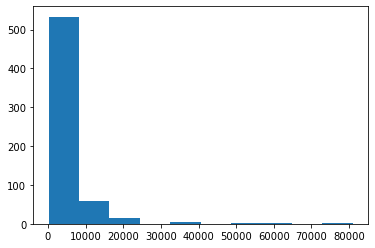

In [83]:
plt.hist(bank2['ApplicantIncome'])

In [89]:
bank2.groupby('income_bracket')['LoanAmount'].mean()

income_bracket
cat 5k     118.065030
cat_10k    179.933678
cat_20k    241.088938
vip        400.701014
Name: LoanAmount, dtype: float64